## 1 Setup Mario

In [ ]:
#!pip install gym-super-mario-bros==7.3.0 nespy

In [2]:
# imoort game
import gym_super_mario_bros
#import the joypadWrapper
from nes_py.wrappers import JoypadSpace
#import simplified control
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import gym

In [3]:
#Setup Game
env = gym.make('SuperMarioBros-v0', apply_api_compatibility=True,render_mode='human')

env=JoypadSpace(env,SIMPLE_MOVEMENT)


/opt/anaconda3/lib/python3.11/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/opt/anaconda3/lib/python3.11/site-packages/gym/envs/registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


In [ ]:
done = True

for step in range(1000):
    if done:
       env.reset()

    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    env.render()

    

env.close()

 


## 2 PreProcess Environment

In [ ]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

In [78]:
!pip install stable-baselines3


2398.26s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [79]:
from gym.wrappers import GrayScaleObservation

from stable_baselines3.common.vec_env import VecFrameStack,DummyVecEnv

from matplotlib import pyplot as plt

In [85]:
#1. Create the base environment
env = gym.make('SuperMarioBros-v0',apply_api_compatibility=True)
#2. Simplify the control
env=JoypadSpace(env,SIMPLE_MOVEMENT)
#3. Grayscale
env=GrayScaleObservation(env,keep_dim=True)
#4. wrap inside the Dummy Environment
env=DummyVecEnv([lambda: env])
#5. Stack the frames
env= VecFrameStack(env,4,channels_order='last')

/opt/anaconda3/lib/python3.11/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/opt/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [150]:
state=env.reset()


In [140]:
state, reward,done, info = env.step([5])
# fifth action is jump

In [142]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [109]:
state.shape

(1, 240, 256, 4)

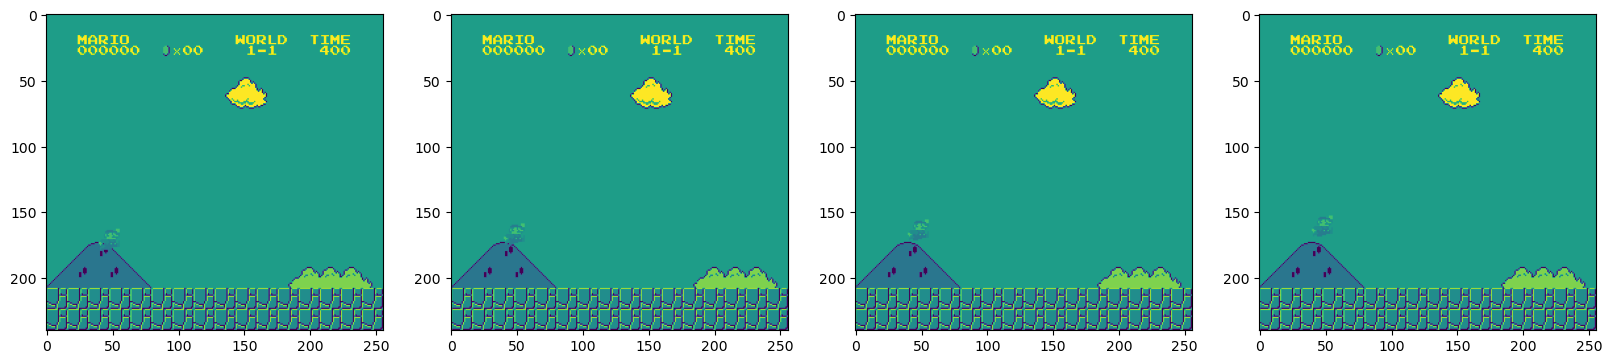

In [141]:
plt.figure(figsize=(20,16))
for idx in range( state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])

plt.show()

## 3 Train the RL model

In [146]:
#import os for file management
import os
#import PPO for algos(Our specific RL model)
from stable_baselines3 import PPO
#import Base Callback for sacing models
from stable_baselines3.common.callbacks import BaseCallback

In [147]:
CHECKPOINT_DIR='./train/'
LOG_DIR='./logs/'

In [ ]:
# setup model saving callback
callback=TrainAndLoggingCallback(chek_freq=100000,save_path=CHECKPOINT_DIR)

In [149]:
#this is the AI model started
model=PPO('CnnPolicy',env,verbose=1,tensorboard_log=LOG_DIR,learning_rate=0.000001,n_steps=512)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [151]:
 
model.learn(total_timesteps=1000000)

Logging to ./logs/PPO_1


/opt/anaconda3/lib/python3.11/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 120 |
|    iterations      | 1   |
|    time_elapsed    | 4   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 18            |
|    iterations           | 2             |
|    time_elapsed         | 55            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 2.5011948e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00165      |
|    learning_rate        | 1e-06         |
|    loss                 | 184           |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000353     |
|    value_loss           | 485           |
-------------------------------------------
-----

In [ ]:
model.save('Mario_RL')

## 4 Test the model

In [ ]:
# Load model
model = PPO.load('./Mario_RL')
state = env.reset()
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()